# Tarea 2 - Mapas
**Alumna : Nicole Roman Quispe (20206093)**

In [7]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

Let's use some familiar DF functions:

In [15]:
# what is it?
type(countries)

geopandas.geodataframe.GeoDataFrame

In [17]:
# dimensions
countries.shape

(252, 2)

In [19]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [21]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [23]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [25]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


As you see, every pandas command is working, but now we have a new column type: **geometry**. Let's see this map of countries:

<Axes: >

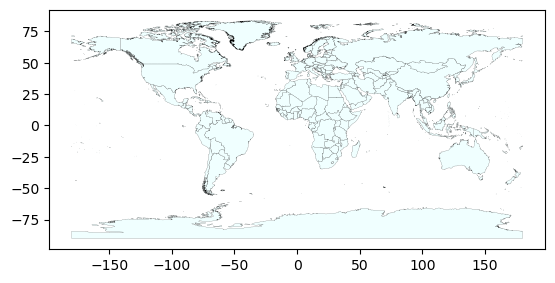

In [27]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

Let's open the other maps:

In [28]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

This is the rivers map:

<Axes: >

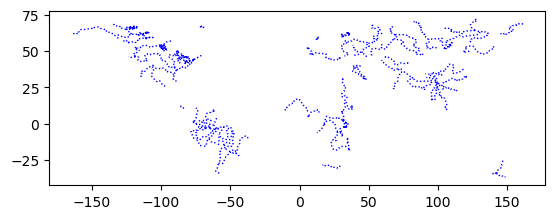

In [31]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

This is the cities map:

<Axes: >

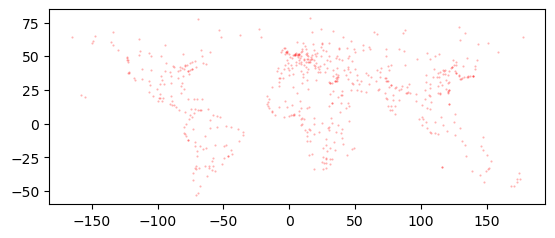

In [33]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

You can plot all the layers, as long as they share the same projection.
Let's verify that all have the same projection (**CRS**):

In [35]:
countries.crs==cities.crs==cities.crs

True

You can start by creating the layer on the back (the base), and add layers on top:

> Agregar bloque entrecomillado



<Axes: >

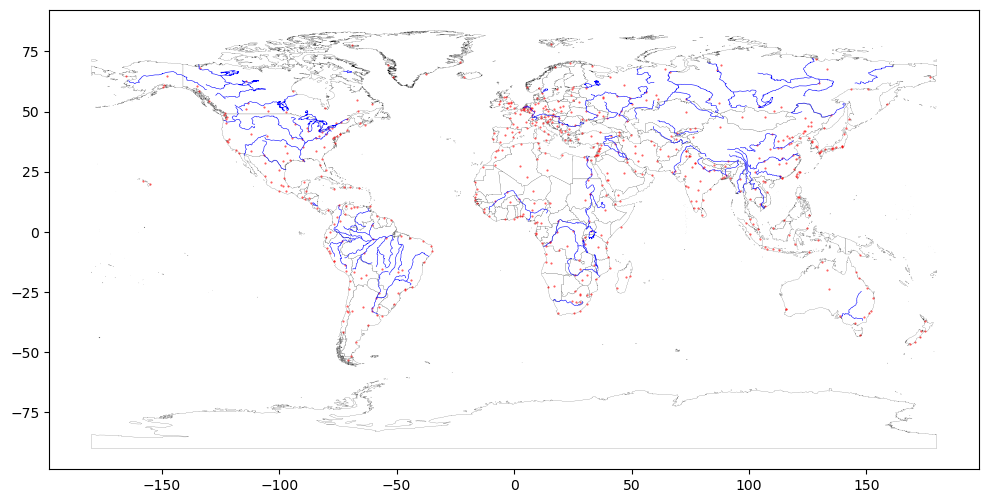

In [37]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...


In [39]:
countries.to_file(os.path.join("maps","worldMap.gpkg"),layer='countryBorders', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMap.gpkg"),layer='riverLines', driver="GPKG")
cities.to_file(os.path.join("maps","worldMap.gpkg"),layer='cityPoints', driver="GPKG")

### Exercise 2
<div class="alert-success">

1. Follow the same steps in this last section, but use Peru.
2. Plot your three layers in R.
    
</div>

In [41]:
Peru=countries[countries.COUNTRY=='Peru']


In [43]:
citiesPeru_clipped = gpd.clip(gdf=cities,
                          mask=Peru)
riversPeru_clipped = gpd.clip(gdf=rivers,
                               mask=Peru)

<Axes: >

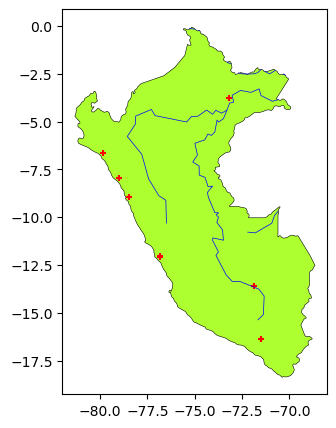

In [45]:
base = Peru.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesPeru_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversPeru_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

In [47]:
Peru.geom_type


172    Polygon
dtype: object

In [49]:
citiesPeru_clipped.geom_type


269    Point
339    Point
529    Point
317    Point
423    Point
260    Point
476    Point
422    Point
dtype: object

In [51]:
riversPeru_clipped.geom_type


59         LineString
1     MultiLineString
60    MultiLineString
85         LineString
65         LineString
dtype: object

In [53]:
import geopandas as gpd
import os

# Define la ruta donde se guardará el archivo GeoPackage
ruta_archivo_gpkg = os.path.join("maps", "Peru_data2.gpkg")

# Crea el archivo GeoPackage con las capas de datos de Peru
gpd.GeoDataFrame(Peru).to_file(ruta_archivo_gpkg, layer='Peru', driver="GPKG")
gpd.GeoDataFrame(citiesPeru_clipped).to_file(ruta_archivo_gpkg, layer='cityPoints', driver="GPKG")
gpd.GeoDataFrame(riversPeru_clipped).to_file(ruta_archivo_gpkg, layer='riverLines', driver="GPKG")


### Pryeccion en Rstudio : https://rpubs.com/nicoleroman1112/1187719


### Exercise 3
<div class="alert-success">

1. Reproject your maps of Peru.
2. Find the airports for Peru [here](https://ourairports.com/data/). The data is in a CSV file.
3. Create projected layer of airports.
4. Plot all the layers in R.
    
</div>

In [55]:
# check units
Peru.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [57]:
# centroid 8901
Peru.centroid

C:\Users\USER\AppData\Local\Temp\ipykernel_8652\4109057433.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Peru.centroid


172    POINT (-74.37549 -9.16382)
dtype: geometry

In [59]:
# recommended for Peru 
Peru.to_crs(8901).crs.axis_info

[Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Ellipsoidal height, abbrev=h, direction=up, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [61]:
# now this works
Peru.to_crs(8901).centroid

C:\Users\USER\AppData\Local\Temp\ipykernel_8652\336773051.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Peru.to_crs(8901).centroid


172    POINT (-74.37549 -9.16382)
dtype: geometry

C:\Users\USER\AppData\Local\Temp\ipykernel_8652\1802128156.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Peru.to_crs(8901).centroid.plot(color='red',ax=base8901)


<Axes: >

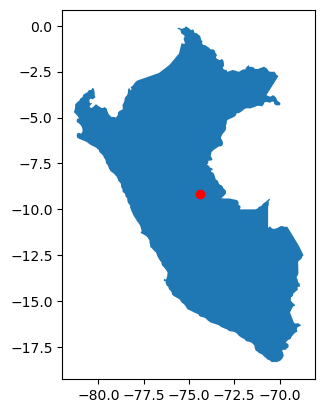

In [63]:
# replotting:

base8901=Peru.to_crs(8901).plot()
Peru.to_crs(8901).centroid.plot(color='red',ax=base8901)

In [65]:
Peru_8901=Peru.to_crs(8901)

cities_Peru_8901=citiesPeru_clipped.to_crs(Peru_8901.crs)

rivers_Peru_8901=riversPeru_clipped.to_crs(Peru_8901.crs)

In [67]:
# saving 
import os

Peru_8901.to_file(os.path.join("maps","PeruMaps_8901B.gpkg"), layer='country', driver="GPKG")
cities_Peru_8901.to_file(os.path.join("maps","PeruMaps_8901B.gpkg"), layer='cities', driver="GPKG")
rivers_Peru_8901.to_file(os.path.join("maps","PeruMaps_8901B.gpkg"), layer='rivers', driver="GPKG")

In [69]:
Peru_8901.centroid


C:\Users\USER\AppData\Local\Temp\ipykernel_8652\184364645.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Peru_8901.centroid


172    POINT (-74.37549 -9.16382)
dtype: geometry

In [71]:
Peru_8901.centroid.to_file(os.path.join("maps","PeruMaps_8901B.gpkg"), layer='centroid', driver="GPKG")



C:\Users\USER\AppData\Local\Temp\ipykernel_8652\3889825405.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Peru_8901.centroid.to_file(os.path.join("maps","PeruMaps_8901B.gpkg"), layer='centroid', driver="GPKG")


AEROPUERTOS DEL PERU

In [73]:
import pandas as pd 
infoairports=pd.read_csv(os.path.join("data","pe-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,6217,SPIM,large_airport,Jorge Chávez International Airport,-12.021900,-77.114305,113.0,SA,Peru,PE,...,Lima,1,SPJC,LIM,NaN,http://www.lap.com.pe/,https://en.wikipedia.org/wiki/Jorge_Ch%C3%A1ve...,"SPIM, SPJC",1050,2021-05-03T09:18:25+00:00
1,6243,SPZO,large_airport,Alejandro Velasco Astete International Airport,-13.535700,-71.938797,10860.0,SA,Peru,PE,...,Cusco,1,SPZO,CUZ,NaN,http://www.corpac.gob.pe/,https://en.wikipedia.org/wiki/Alejandro_Velasc...,NaN,1000,2010-09-07T09:49:15+00:00
2,6233,SPQU,medium_airport,Rodríguez Ballón International Airport,-16.341101,-71.583099,8405.0,SA,Peru,PE,...,Arequipa,1,SPQU,AQP,NaN,NaN,https://en.wikipedia.org/wiki/Rodriguez_Ballon...,NaN,750,2010-09-07T09:47:49+00:00
3,6222,SPJL,medium_airport,Inca Manco Capac International Airport,-15.467100,-70.158203,12552.0,SA,Peru,PE,...,Juliaca,1,SPJL,JUL,NaN,NaN,https://en.wikipedia.org/wiki/Inca_Manco_Capac...,NaN,750,2008-07-21T16:57:31+00:00
200,351487,PE-0013,heliport,Pucallpa Air Force Heliport,-8.351500,-74.581900,505.0,SA,Peru,PE,...,Pucallpa,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:32:29+00:00
201,351489,PE-0015,heliport,Puerto Anapati Heliport,-11.928590,-73.987700,1496.0,SA,Peru,PE,...,Puerto Anapati,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:37:03+00:00
202,351491,PE-0017,heliport,Puerto Ocopa Heliport,-11.147930,-74.306290,1056.0,SA,Peru,PE,...,Puerto Ocopa,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:40:40+00:00
203,351492,PE-0018,heliport,Tanquin Heliport,-12.126320,-74.075990,1880.0,SA,Peru,PE,...,Tanquin,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:42:05+00:00


In [75]:
# bye first row 
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,6243,SPZO,large_airport,Alejandro Velasco Astete International Airport,-13.535700,-71.938797,10860.0,SA,Peru,PE,...,Cusco,1,SPZO,CUZ,NaN,http://www.corpac.gob.pe/,https://en.wikipedia.org/wiki/Alejandro_Velasc...,NaN,1000,2010-09-07T09:49:15+00:00
1,6233,SPQU,medium_airport,Rodríguez Ballón International Airport,-16.341101,-71.583099,8405.0,SA,Peru,PE,...,Arequipa,1,SPQU,AQP,NaN,NaN,https://en.wikipedia.org/wiki/Rodriguez_Ballon...,NaN,750,2010-09-07T09:47:49+00:00
2,6222,SPJL,medium_airport,Inca Manco Capac International Airport,-15.467100,-70.158203,12552.0,SA,Peru,PE,...,Juliaca,1,SPJL,JUL,NaN,NaN,https://en.wikipedia.org/wiki/Inca_Manco_Capac...,NaN,750,2008-07-21T16:57:31+00:00
3,6242,SPZA,medium_airport,Maria Reiche Neuman Airport,-14.854000,-74.961502,1860.0,SA,Peru,PE,...,Nazca,1,SPZA,NZC,NaN,https://www.aeronasca.com/como-llegar-al-aerop...,https://en.wikipedia.org/wiki/Maria_Reiche_Neu...,NaN,750,2022-04-07T13:53:44+00:00
4,6232,SPQT,medium_airport,Coronel FAP Francisco Secada Vignetta Internat...,-3.784740,-73.308800,306.0,SA,Peru,PE,...,Iquitos,1,SPQT,IQT,NaN,NaN,https://en.wikipedia.org/wiki/Crnl._FAP_Franci...,NaN,750,2022-08-29T12:46:38+00:00


In [77]:
# keep the  columns needed

infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [79]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [81]:
infoairports.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           203 non-null    object 
 1   type           203 non-null    object 
 2   latitude_deg   203 non-null    float64
 3   longitude_deg  203 non-null    float64
 4   elevation_ft   191 non-null    float64
 5   region_name    203 non-null    object 
 6   municipality   195 non-null    object 
dtypes: float64(3), object(4)
memory usage: 11.2+ KB


In [83]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           203 non-null    object 
 1   type           203 non-null    object 
 2   latitude_deg   203 non-null    float64
 3   longitude_deg  203 non-null    float64
 4   elevation_ft   191 non-null    float64
 5   region_name    203 non-null    object 
 6   municipality   195 non-null    object 
dtypes: float64(3), object(4)
memory usage: 11.2+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

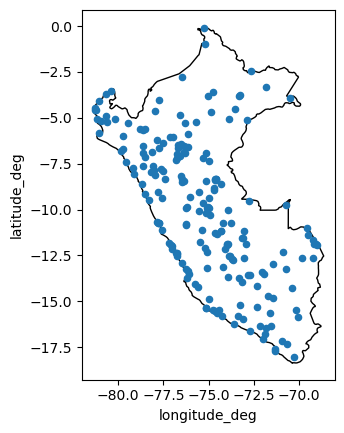

In [85]:
# let's plot

base = Peru_8901.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [91]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=Peru.crs.to_epsg())# the coordinates were in degrees - unprojected

<Axes: >

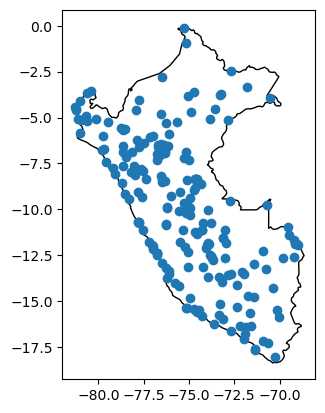

In [93]:
# does it look better?

# let's plot

base = Peru_8901.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [95]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

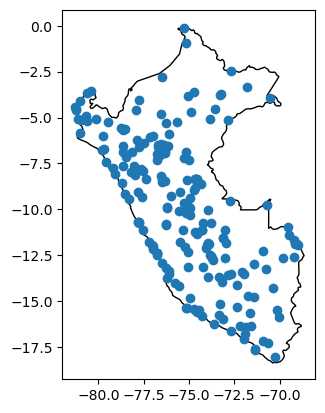

In [97]:
airports_8901=airports.to_crs(8901)

## then

base = Peru_8901.plot(color='white', edgecolor='black')
airports_8901.plot(ax=base)

In [99]:
airports_8901['type'].value_counts() # this will not work: airports.type.value_counts()


type
small_airport     142
medium_airport     29
closed             25
heliport            6
large_airport       1
Name: count, dtype: int64

In [101]:
airports_8901.rename(columns={'type':'kind'},inplace=True)


In [103]:
# adding the airports
airports_8901.to_file(os.path.join("maps","PeruMaps_8901.gpkg"), layer='airports', driver="GPKG")

### PROYECCION EN RSTUDIO : https://rpubs.com/nicoleroman1112/1187719

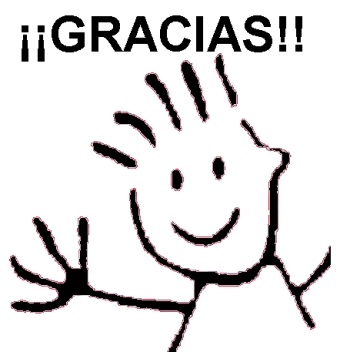